# Verifying data transfer

The purpose of this notebook is to show that the ETL had completed successfully and verify the data integrity by running ad-hoc queries against the 5 FACT & DIMENSION tables.

### Load libraries

In [1]:
%load_ext sql

In [2]:
import boto3
import configparser
import matplotlib.pyplot as plt
import pandas as pd
import json
import time
import psycopg2

### Connect to DB

In [3]:
# Read config files
config = configparser.ConfigParser()
config.read('dwh.cfg')
host, dbname, user, = config.get("DWH","dwh_endpoint"), config.get("DWH", "dwh_db"),  config.get("DWH", "dwh_db_user")
password, port =  config.get("DWH", "dwh_db_password"),  config.get("DWH", "dwh_port")
arn_role = config.get("DWH", "dwh_role_arn")

# Connect to cloud
connection_string = "host={} dbname={} user={} password={} port={}".format(host, dbname, user, password, port)
conn = psycopg2.connect(connection_string)
cur = conn.cursor()
conn.set_session(autocommit=True)

print("Connection Established.")

Connection Established.


## Get row counts for each table

In [4]:
# Find number of rows in each table
table_names = ['star_schema.songplays', 'star_schema.time', 'star_schema.artists', 'star_schema.users', 'star_schema.songs']

for table in table_names: 
    
    try: 
        sql_string = "SELECT COUNT(*) FROM " + table + ";"
        cur.execute(sql_string)
    except psycopg2.Error as e: 
        print("Error: select *")
        print (e)

    print(table)
    row = cur.fetchone()
    while row:
       print(row)
       row = cur.fetchone()
    print("\n")

star_schema.songplays
(333,)


star_schema.time
(8056,)


star_schema.artists
(14896,)


star_schema.users
(6820,)


star_schema.songs
(14896,)




## Get the most popular browser

In [5]:
# Get the most popular user agant
sql_string = "SELECT DISTINCT user_agent FROM star_schema.songplays;"
cur.execute(sql_string)
row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2"',)
('Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0',)
('"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"',)
('"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/36.0.1985.125 Chrome/36.0.1985.125 Safari/537.36"',)
('"Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Version/7.0 Mobile/11D257 Safari/9537.53"',)
('"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36"',)
('"Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"',)
('"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36"',)
('"Mozilla/5.0 (Macintosh; Inte

In [6]:
# Get the popular user agant
sql_string = "SELECT COUNT(*) FROM star_schema.songplays WHERE user_agent LIKE '%Safari%';"
cur.execute(sql_string)
row = cur.fetchone()
print("Safari users: ", row)

sql_string = "SELECT COUNT(*) FROM star_schema.songplays WHERE user_agent LIKE '%Chrome%';"
cur.execute(sql_string)
row = cur.fetchone()
print("Chrome users: ", row)

sql_string = "SELECT COUNT(*) FROM star_schema.songplays WHERE user_agent LIKE '%Firefox%';"
cur.execute(sql_string)
row = cur.fetchone()
print("Firefox users: ", row)

Safari users:  (244,)
Chrome users:  (187,)
Firefox users:  (88,)


## Get gender breakdown of users

In [7]:
sql_string = "SELECT star_schema.users.gender, COUNT(*)  FROM star_schema.songplays JOIN star_schema.users ON star_schema.songplays.user_id = users.userid GROUP BY star_schema.users.gender"
cur.execute(sql_string)
row = cur.fetchone()
counter = 0
while row:
    print(row)
    row = cur.fetchone()
    counter += 1
    if counter == 5: break

('M', 17586)
('F', 98186)


(-1.1048113584651906,
 1.1065533188008205,
 -1.105892724060336,
 1.1002806059076351)

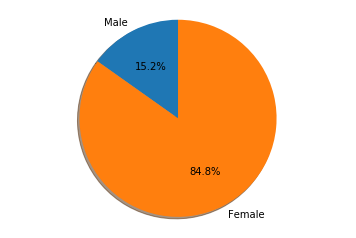

In [8]:
# Visualize using pie chart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Male', 'Female']
sizes = [17586, 98186]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
